In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Limpiado de fechas.
iter_statusMin = pd.read_csv('dataset/status.csv', iterator = True, chunksize = 100000)
chunk = iter_statusMin.get_chunk()
chunk.time.replace("/","-",regex=True, inplace=True)
chunk.to_csv('dataset/salida2.csv',mode='w', header=True)

for chunk in iter_statusMin:
    chunk.time.replace("/","-",regex=True, inplace=True)
    chunk.to_csv('dataset/salida2.csv',mode='a', header=False)

### TODO: hacer plot de primer y último tiempo de viaje de una bicicleta para ver si se perdió.

In [5]:
# Cálculo de la última fecha de status.
iter_csv = pd.read_csv('dataset/status.csv', iterator=True,chunksize=100000)
maximaFecha = max([chunk.time.max() for chunk in iter_csv])

In [6]:
print(maximaFecha)

2015-08-31 23:59:02


In [8]:
# Cálculo de la primera fecha de status.
iter_csv = pd.read_csv('dataset/status.csv', iterator=True,chunksize=100000)
minimaFecha = min([chunk.time.min() for chunk in iter_csv])

2013-08-29 12:06:01


In [9]:
print(minimaFecha)

2013-08-29 12:06:01


In [136]:
# El archivo va entre el 29 de agosto del 2013 hasta el 31 de agosto del 2015. 
# Vamos a ver la cantidad de bicicletas para el 25 de agosto del 2015.
iter_csv = pd.read_csv('status.csv', iterator=True,chunksize=100000)
df_estacionadas = pd.concat([chunk[(chunk['time'] >= "2015-08-25 12:00:00") & (chunk['time'] < "2015-08-25 12:01:00")] for chunk in iter_csv])

In [142]:
#len(df_estacionadas)
totalEstacionadas = sum(df_estacionadas.bikes_available)

In [10]:
# Viajes grabados.
viajes = pd.read_csv('dataset/trip.csv')

In [140]:
viajes.end_date = pd.to_datetime(viajes.end_date)

In [25]:
# Queremos ver qué intervalo de viajes tenemos.
viajes.start_date = pd.to_datetime(viajes.start_date)

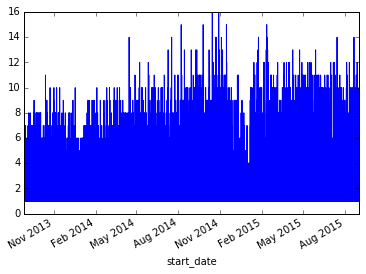

In [42]:
viajes.groupby(viajes.start_date)["start_date"].count().plot()

In [109]:
iter_csv = pd.read_csv('dataset/status.csv', iterator=True,chunksize=100000)
# Saco los datos del último mes, para tener algo más manejable.
estacionadas_agosto = pd.concat([chunk[chunk['time'] >= "2015-08-01 00:00:00"] for chunk in iter_csv])

In [122]:
estacionadas_agosto_por_minuto = estacionadas_agosto.groupby("time")["bikes_available","docks_available"].sum()

600
484
745
634


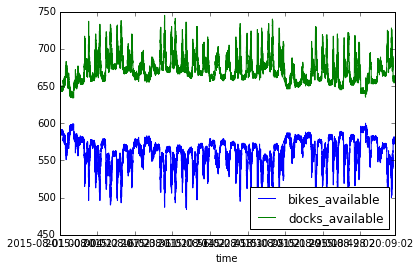

In [126]:
print(estacionadas_agosto_por_minuto.bikes_available.max())
print(estacionadas_agosto_por_minuto.bikes_available.min())
print(estacionadas_agosto_por_minuto.docks_available.max())
print(estacionadas_agosto_por_minuto.docks_available.min())
#estacionadas_agosto.sort_values(by="time")
estacionadas_agosto_por_minuto.plot()

In [128]:
estacionadas_agosto_por_minuto[estacionadas_agosto_por_minuto['bikes_available'] == 600]

,bikes_available,docks_available
time,,
2015-08-29 07:49:02,600,635
2015-08-29 07:50:03,600,635


In [141]:
# En los momentos de máxima cantidad de estacionamientos mido la cantidad de alquiladas con trips.
viajes[(viajes.start_date < "2015-08-29 07:49:02") & (viajes.end_date > "2015-08-29 07:49:02")]

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
317833,910713,4323,2015-08-29 07:26:00,Embarcadero at Vallejo,48,2015-08-29 08:38:00,Embarcadero at Vallejo,48,355,Customer,NaN
317873,910666,55805,2015-08-28 21:16:00,Broadway St at Battery St,82,2015-08-29 12:46:00,Steuart at Market,74,212,Subscriber,94111


In [142]:
# Maxima cantidad de bicicletas en funcionamiento (andando)
viajes.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103
